# Classification based on drug type

## Models Tested

- Logistic Regression
- Random Forest Classifier
- Decision Tree Classifier
- Support Vector Classification (SVC)
- Extreme Gradient Boosting (XGBoost)
- K-Nearest Neighbors (KNN)
- Naive Bayes Classifier
- Multi-Layer Perceptron (MLP) Classifier
- Stacking Classifier (Stacking Random Forest Classifier, Support Vector Classification and Logistic Regression)


## Loading Datasets

- Drug1: data of 24 worms (12 control, 12 drugged) for binary classification
- Drgu2: data of 24 worms (12 control, 12 drugged) for binary classification
- Combined: data for 48 worms (24 control, 24 drugged) for multi-class classification

In [1]:
import pandas as pd
import numpy as np
from classification_functions import *

In [2]:
csv = '../lifespan_merged_datasets/mergedworms_Drug1.csv'# Read the CSV file
data = pd.read_csv(csv)
np.random.seed(42)

csv2 = '../lifespan_merged_datasets/mergedworms_Drug2.csv'# Read the CSV file
data2 = pd.read_csv(csv2)
data2.loc[data2['drugged'] == 2, 'drugged'] = 1

csv3 = '../lifespan_merged_datasets/mergedworms_combined.csv'# Read the CSV file
data3 = pd.read_csv(csv3)

random_state = 42

The function `group_kfold_validation_all_models` is called from `classification_function.py`. In this function, GroupKFold cross-validation is performed for multiple models on the dataset based on worm_id (It is split by group id to ensure all data for a worm belongs in either the training or testing set)

## Binary Classification: Drug1

In [3]:
# Call the function with Drug1 dataset
results = group_kfold_validation_all_models(data, n_splits=5, random_state=random_state)

results_binary_drug1 = pd.DataFrame(results)

print("\nModel Evaluation Results: Classification of Drug1\n")
print(results_binary_drug1)


Evaluating model: logistic
Evaluating model: random_forest
Evaluating model: decision_tree
Evaluating model: svm
Evaluating model: xgboost
Evaluating model: knn
Evaluating model: naive_bayes
Evaluating model: mlp_classifier
Evaluating model: stacking_classifier

Model Evaluation Results: Classification of CompanyDrug

                 model  mean_accuracy  std_deviation
0             logistic       0.675370       0.141958
1        random_forest       0.698233       0.070437
2        decision_tree       0.658873       0.090438
3                  svm       0.741053       0.137489
4              xgboost       0.635823       0.083021
5                  knn       0.465153       0.022586
6          naive_bayes       0.633849       0.074939
7       mlp_classifier       0.486598       0.178961
8  stacking_classifier       0.673182       0.089421


Best Model **SVM - Classifier**

### Saving the best model



In [4]:
import joblib
import os

model, mean, std = return_model(data, model_name="svm", n_splits=5, random_state=random_state)

# Define the directory and file path
output_dir = "../models"
output_file = os.path.join(output_dir, "best_model_Drug1.pkl")

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"Mean Accuracy : {mean}, Standard Deviation: {std}")
# Save the model
joblib.dump(model, '../models/best_model_Drug1.pkl')
print("Model saved successfully!")

Mean Accuracy : 0.7410532758163497, Standard Deviation: 0.13748867995782124
Model saved successfully!


## Binary Classification: Drug2

In [5]:
# Call the function with Drug2 dataset
results2 = group_kfold_validation_all_models(data2, n_splits=5, random_state=random_state)

results_binary_drug2 = pd.DataFrame(results2)

print("\nModel Evaluation Results: Classification of Drug2\n")
print(results_binary_drug2)

Evaluating model: logistic
Evaluating model: random_forest
Evaluating model: decision_tree
Evaluating model: svm
Evaluating model: xgboost
Evaluating model: knn
Evaluating model: naive_bayes
Evaluating model: mlp_classifier
Evaluating model: stacking_classifier

Model Evaluation Results: Classification of Terbinafine

                 model  mean_accuracy  std_deviation
0             logistic       0.272920       0.125347
1        random_forest       0.306345       0.080516
2        decision_tree       0.151252       0.142860
3                  svm       0.419421       0.032188
4              xgboost       0.167358       0.156587
5                  knn       0.453511       0.088977
6          naive_bayes       0.458993       0.279271
7       mlp_classifier       0.372215       0.237812
8  stacking_classifier       0.513674       0.083363


Best Model **Stacking Classifier**

### Saving the best model


In [6]:
import joblib
import os

model, mean, std = return_model(data2, model_name="stacking_classifier", n_splits=5, random_state=random_state)

# Define the directory and file path
output_dir = "../models"
output_file = os.path.join(output_dir, "best_model_Drug2.pkl")

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"Mean Accuracy : {mean}, Standard Deviation: {std}")
# Save the model
joblib.dump(model, '../models/best_model_Drug2.pkl')
print("Model saved successfully!")

Mean Accuracy : 0.5077994356638602, Standard Deviation: 0.05836190676627381
Model saved successfully!


## Multi-class Classification

In [7]:
results3 = group_kfold_validation_all_models(data3)

results_multiclass = pd.DataFrame(results3)

print("\nModel Evaluation Results: Multi-Class Classification\n")
print(results_multiclass)

Evaluating model: logistic
Evaluating model: random_forest
Evaluating model: decision_tree
Evaluating model: svm
Evaluating model: xgboost
Evaluating model: knn
Evaluating model: naive_bayes
Evaluating model: mlp_classifier
Evaluating model: stacking_classifier

Model Evaluation Results: Multi-Class Classification

                 model  mean_accuracy  std_deviation
0             logistic       0.528055       0.073977
1        random_forest       0.494260       0.085541
2        decision_tree       0.439865       0.090284
3                  svm       0.488906       0.084281
4              xgboost       0.440228       0.072414
5                  knn       0.428380       0.051335
6          naive_bayes       0.494440       0.090445
7       mlp_classifier       0.372592       0.085104
8  stacking_classifier       0.448913       0.113588


In [8]:
import joblib
import os

model, mean, std = return_model(data3, model_name="logistic", n_splits=5, random_state=random_state)

# Define the directory and file path
output_dir = "../models"
output_file = os.path.join(output_dir, "best_model_multiclass.pkl")

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"Mean Accuracy : {mean}, Standard Deviation: {std}")
# Save the model
joblib.dump(model, '../models/best_model_multiclass.pkl')
print("Model saved successfully!")

Mean Accuracy : 0.5280547716645169, Standard Deviation: 0.07397719018890915
Model saved successfully!


## Plotting Results

### All models combined

First, concatenate all results to one dataframe for plotting

In [9]:
results_binary_drug1["task"] = ["Binary (Drug1)"] * 9
results_binary_drug2["task"] = ["Binary (Drug2)"] * 9
results_multiclass["task"] = ["Multi-class"] * 9
all_results = pd.concat([results_binary_drug1, results_binary_drug2, results_multiclass])

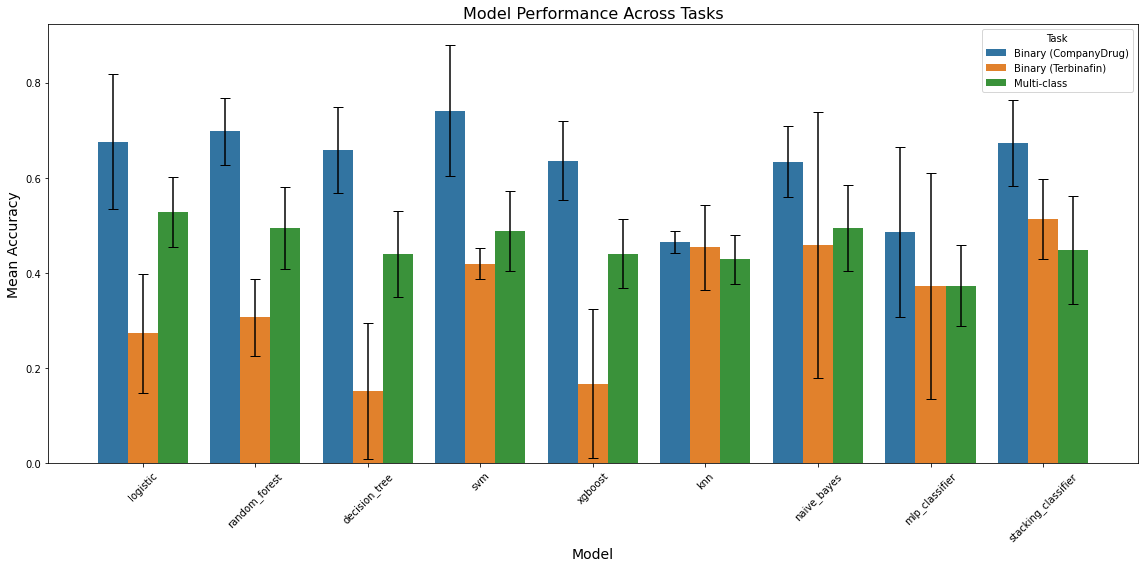

In [10]:
plot_all_df(all_results)

## Best 5 models

The best five models overall (performance across all three models) were:
- SVM Classifier
- Stacking Classifier
- Logistic
- Random Forest Classifier
- Naive Bayes Classifier

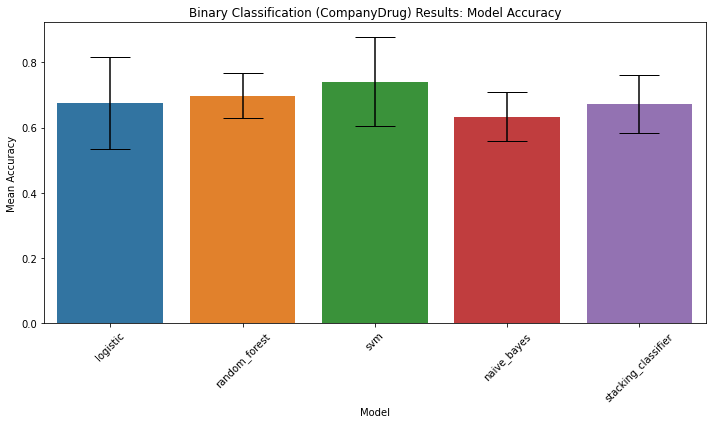

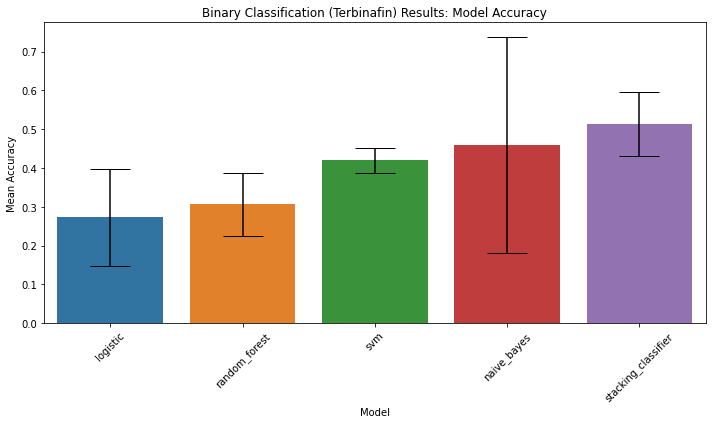

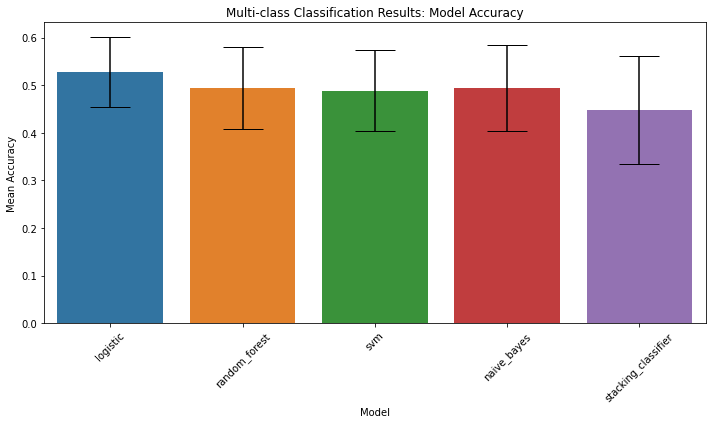

In [11]:
results_binary_drug1.drop('task', axis=1)
results_binary_drug2.drop('task', axis=1)
results_multiclass.drop('task', axis=1)

# Top 5 models for each task (determined based on all results)
top_5_classes = ["svm", "stacking_classifier", "random_forest", "logistic", "naive_bayes"]

# Filter the results for top 5 models
filtered_results_binary_drug1 = results_binary_drug1[results_binary_drug1["model"].isin(top_5_classes)]
filtered_results_binary_drug2 = results_binary_drug2[results_binary_drug2["model"].isin(top_5_classes)]
filtered_results_multiclass = results_multiclass[results_multiclass["model"].isin(top_5_classes)]

plots_df = [filtered_results_binary_drug1, filtered_results_binary_drug2, filtered_results_multiclass]

#plot a bar plot comparing the best 5 results for each classification type
plot_best_five_individual(plots_df)